## Regular expression operations

A regular expression is a special sequence of characters that helps you match or find other strings or sets of strings, using a specialized syntax held in a pattern. Python has a built-in package called re, which can be used to work with Regular Expres-sions.

You can find details here: https://docs.python.org/3/library/re.html#regular-expression-syntax


In [173]:
import re 
import requests
from bs4 import BeautifulSoup
import pandas as pd

#### 1. Write a regexp to extract the score, Cristiano’s age, number of goals and the number of selections from the following text:

In [174]:
txt = "Buteur face au Qatar (3-0), samedi en amical, Cristiano Ronaldo (36 ans) a fait tomber un nouveau record. En effet, l'attaquant de Manchester United, meilleur buteur de l'histoire des sélections (112 buts), est devenu le footballeur européen le plus capé avec son équipe nationale. Il compte désormais 181 matchs avec la formation lusitanienne, soit un de plus que Sergio Ramos avec l'Espagne. Le Red Devil n'est plus qu'à cinq longueurs de Bader Ahmed al-Mutawa (Koweït), recordman absolu à l'échelle mondiale."

In [175]:
txt = "Buteur face au Qatar (3-0), samedi en amical, Cristiano Ronaldo (36 ans) a fait tomber un nouveau record. En effet, l'attaquant de Manchester United, meilleur buteur de l'histoire des sélections (112 buts), est devenu le footballeur européen le plus capé avec son équipe nationale. Il compte désormais 181 matchs avec la formation lusitanienne, soit un de plus que Sergio Ramos avec l'Espagne. Le Red Devil n'est plus qu'à cinq longueurs de Bader Ahmed al-Mutawa (Koweït), recordman absolu à l'échelle mondiale."
score= re.search(r'\(\d-\d\)',txt).group(0)
age = re.search(r'\d+ ans',txt).group()
nb_buts = re.search(r'(\d+) buts', txt).group(1)
nb1_buts = re.search(r'(\d+) (buts)', txt).group(2)
nb_selections = re.findall(r'Il compte désormais (\d+) matchs avec la formation lusitanienne', txt)
score, age, nb_buts, nb1_buts, nb_selections

('(3-0)', '36 ans', '112', 'buts', ['181'])

#### 2. Write a regexp to get prices from the following text:

In [176]:
txt = "Vous cherchez un nouvel ordinateur portable performant, fiable et en réduction ? Sur Rakuten, l’ordinateur Apple MacBook Air 2020 est en promotion, avec une remise de près de 230 euros pour un tarif final qui chute sous les 900 euros grâce à la plateforme marchande."

In [177]:
txt = "Vous cherchez un nouvel ordinateur portable performant, fiable et en réduction ? Sur Rakuten, l’ordinateur Apple MacBook Air 2020 est en promotion, avec une remise de près de 230 euros pour un tarif final qui chute sous les 900 euros grâce à la plateforme marchande."
prices = re.findall('(\d+) euros', txt)
for price in prices:
    print(price, 'euros')

230 euros
900 euros


#### 3. Write a regexp to get reduction values, along with promo code:

In [178]:
txt = """
- 40% sur tous les réservoirs d'essence et collecteurs d'échappement ( achats internet uniquement ) avec le code promo: PRINTEMPS

- 40% sur tous les carénages plastique  ( achats internet uniquement ) avec le code promo: CARENAGE40

- 50% sur toutes les rampes d'injection ( achats internet uniquement ) avec le code promo: INJECTION50
"""

In [179]:
import re

# Texte fourni
txt = """
- 40% sur tous les réservoirs d'essence et collecteurs d'échappement (achats internet uniquement) avec le code promo: PRINTEMPS
- 40% sur tous les carénages plastique (achats internet uniquement) avec le code promo: CARENAGE40
- 50% sur toutes les rampes d'injection (achats internet uniquement) avec le code promo: INJECTION50
"""

# Extraction des pourcentages et des codes promo
pourcent = re.findall(r'(\d+%)', txt)
code = re.findall(r'promo: (\w+)', txt)

# Formation du format de sortie souhaité
desired_output = ["Reduction de {} avec le code promo : {}".format(p, c) for p, c in zip(pourcent, code)]
desired_output


['Reduction de 40% avec le code promo : PRINTEMPS',
 'Reduction de 40% avec le code promo : CARENAGE40',
 'Reduction de 50% avec le code promo : INJECTION50']

# Web scrapping

# Parsing the HTML with BeautifulSoup

BeautifulSoup is a Python library for parsing HTML and XML documents. It is often used for web scraping. BeautifulSoup transforms a complex HTML document into a complex tree of Python objects, such as tag, navigable string, or comment.

### Téléthon use case (read, store, visualize)
https://www.afm-telethon.fr/fr/le-telethon/le-telethon-c-est-quoi/l-histoire-du-telethon/les-resultats-du-telethon

In [180]:
url        = "https://www.afm-telethon.fr/fr/le-telethon/le-telethon-c-est-quoi/l-histoire-du-telethon/les-resultats-du-telethon"
requesting = requests.get(url)
soup       = BeautifulSoup(requesting.content, "html.parser")


In [181]:

with open('tst.html', 'w') as f:
    f.write(str(soup))

    

## Let's look for some information in the page

#### 1. In 2006, the counter reached its highest level. Extract this information from the webpage (a sentence in the page).

In [182]:
# Using css selector

In [183]:
info = re.findall('2006 .* €',requesting.text)
print(info)
    

['2006 que le compteur a atteint son niveau le plus haut, avec 106 696 532 €']


In [184]:
# Using tags 

In [185]:
info2 = soup.find_all("p")
for p in info2:
    p = p.text
    if '2006' in p:
        n = re.search('\d+ \d+ \d+ €',p).group()
        print(n)
        
# .text

106 696 532 €


#### 2. Retrieve the publication date from the webpage, using the CSS classes.

In [186]:
requesting = requests.get(url)
soup = BeautifulSoup(requesting.content, "html.parser")
date_element = soup.find(class_="date")
publication_date = date_element.get_text() if date_element else "Publication date not found"
print(publication_date)


                  Publié le 09/06/2022, mis à jour le 19/06/2023


#### 3. Find the number of tables defined in the soup. 

In [187]:
n = pd.read_html(url)
num_tables= len(n)
print(f"Number of tables: {num_tables}")

Number of tables: 1


#### 3. Retrieve the items from this table. Create a python dataframe representing this table (do not forget to include the name of the columns as defined in the webpage).

In [188]:
n[0].head()

,Année,Montant collecté
0,1987,29 650 000 €
1,1988,28 490 000 €
2,1989,40 930 000 €
3,1990,46 510 000 €
4,1991,38 650 000 €


#### 4. Clean up columns and their types 
(it's up to you to propose how, why and what to do)

In [189]:
df=pd.DataFrame(n[0])
df.dtypes

Année                int64
Montant collecté    object
dtype: object

In [190]:
df["Montant collecté"]=df["Montant collecté"].astype('string').str[:-1]
df.head()
df.dtypes

Année                int64
Montant collecté    string
dtype: object

In [191]:
df["Montant collecté"]=df["Montant collecté"].str.replace(" ","")
df.head()

,Année,Montant collecté
0,1987,29650000
1,1988,28490000
2,1989,40930000
3,1990,46510000
4,1991,38650000


In [192]:
df["Montant collecté"]=df["Montant collecté"].astype(int)
df.head()

,Année,Montant collecté
0,1987,29650000
1,1988,28490000
2,1989,40930000
3,1990,46510000
4,1991,38650000


#### 5. Retrieve the date when the most amount was collected 

(we already scrapped the info before, here we want the info with the table)

In [193]:
date = df.sort_values(by="Montant collecté", ascending=False)
date.head(1)

,Année,Montant collecté
19,2006,106696532


#### 6. Visualize the evolution of the amount collected per year.
#### Mark the maximum and minimum of the evolution with respectively red and green colors.

C:\Users\raphv\AppData\Local\Temp\ipykernel_16500\4102633390.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')  # Utiliser un style de fond


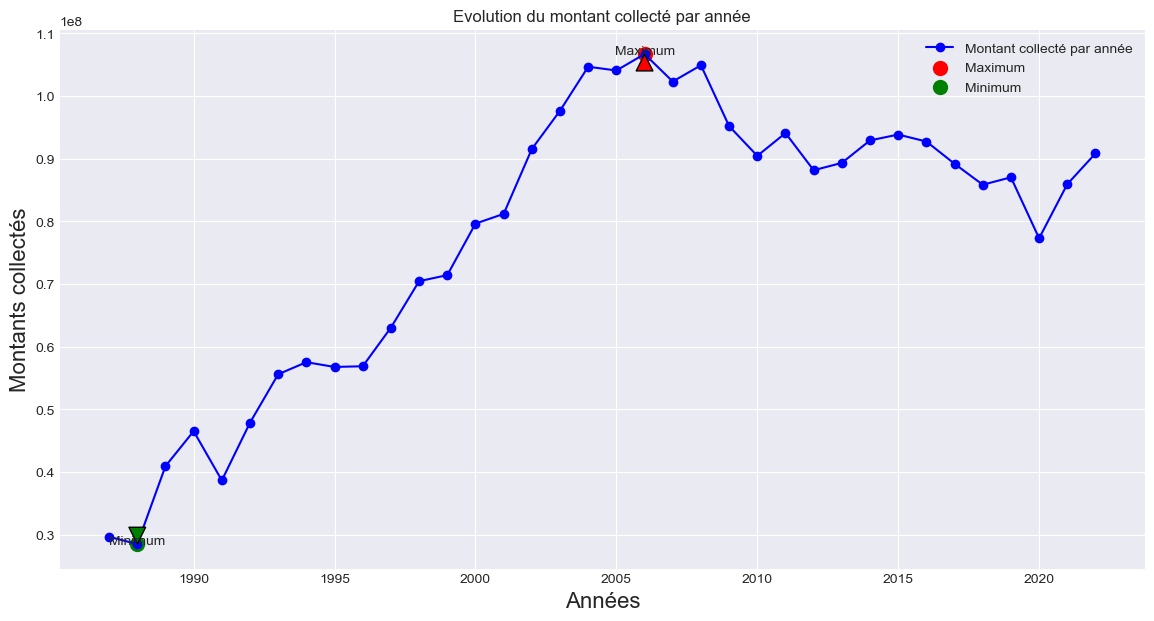

In [194]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df['Année'],df['Montant collecté'],"o-")
plt.xlabel("Années", size = 16,)
plt.ylabel("Montants collectés", size = 16)
plt.title("Evolution du montant collecté par année")

x=df['Année'].tolist()
y=df['Montant collecté'].tolist()

ymax = max(df['Montant collecté'])
xpos1 = y.index(ymax)
xmax = x[xpos1]

ymin = min(df['Montant collecté'])
xpos2 = y.index(ymin)
xmin = x[xpos2]

plt.annotate('Maximum', xy=(xmax, ymax), xytext=(xmax, ymax+5),
            arrowprops=dict(facecolor='red', shrink=0.05),
            )
plt.annotate('Minimum', xy=(xmin, ymin), xytext=(xmin, ymin+5),
            arrowprops=dict(facecolor='green', shrink=0.05),
            )

plt.show

## 7. Bonus question: We expect the graph bellow:

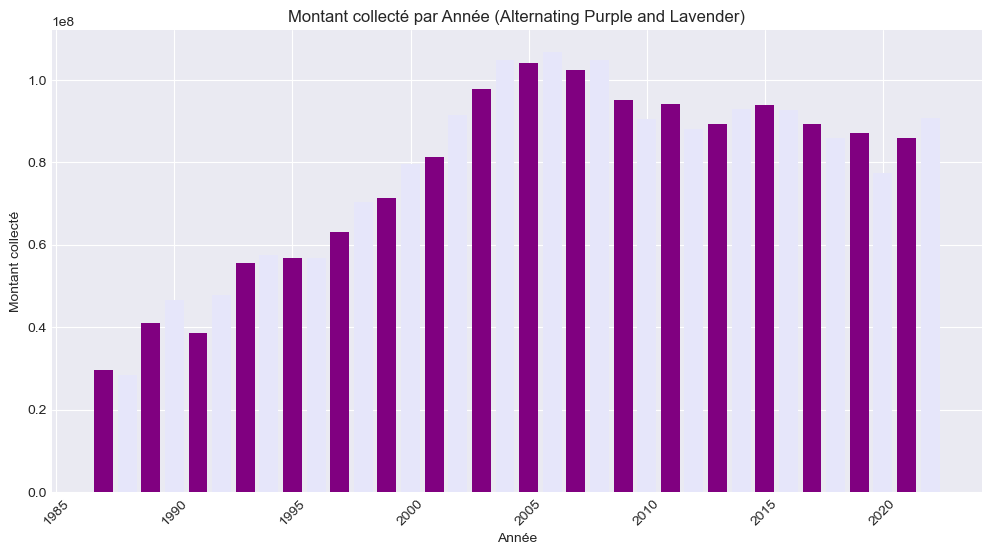

In [198]:
import matplotlib.pyplot as plt


# Create a bar graph with alternating colors
fig, ax = plt.subplots(figsize=(12, 6))
bar_colors = ['purple', 'lavender']

for i, row in df.iterrows():
    color = bar_colors[i % 2]  # Alternating colors
    plt.bar(row["Année"], row["Montant collecté"], color=color, label=str(row["Année"]))

# Set labels and title
plt.xlabel("Année")
plt.ylabel("Montant collecté")
plt.title("Montant collecté par Année (Alternating Purple and Lavender)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)



# Show the plot
plt.show()

## Use case 2: https://www.infoclimat.fr/observations-meteo/archives/7/septembre/2019/paris-montsouris/07156.html

In [ ]:
url   = "https://www.infoclimat.fr/observations-meteo/archives/7/septembre/2019/paris-montsouris/07156.html"
page  = requests.get(url )
html  = page.text
soup  = BeautifulSoup(html)

#### Convert the table of this site into a pandas dataframe

You must include the names of the columns and the names of the rows (the hours) as an index 

### To help you: Define a function that allows you to retrieve the value of row i and column j of the table

In [ ]:
# Find all tables on the page
tables = soup.find_all("table")

# Look for the table that contains data (based on your specific website structure)
target_table = None
for table in tables:
    if "Température" in str(table):
        target_table = table
        break

if target_table is not None:
    # Extract the data from the table
    data = []
    for row in target_table.find_all("tr"):
        columns = row.find_all("td")
        if columns:
            data.append([column.get_text(strip=True) for column in columns])

    # Create a pandas DataFrame
    df = pd.DataFrame(data[1:], columns=data[0])

    # Drop the first and fifth columns
    df = df.drop(df.columns[[0]], axis=1)

    # Reset the index to numbers
    df.reset_index(drop=True, inplace=True)

    # Print the resulting DataFrame
    print(df)
else:
    print("Table not found on the webpage.")

    13.9°C13.9→14.3  0mm/1h  14km/hraf.32.4  76%        9.7°C    1023hPa  20km
0   14.3°C14.3→14.9  0mm/1h  18km/hraf.37.8  73%        9.5°C  1023.2hPa  20km
1   14.9°C14.7→14.9  0mm/1h  14km/hraf.39.6  69%        9.3°C  1023.0hPa  20km
2   14.8°C14.8→15.4  0mm/1h  18km/hraf.34.2  67%        8.7°C  1022.8hPa  20km
3   15.4°C15.4→16.8  0mm/1h  14km/hraf.45.7  62%        8.2°C  1022.2hPa  20km
4   16.8°C16.8→17.8  0mm/1h  22km/hraf.42.8  59%   81   8.7°C  1021.6hPa  20km
5   17.7°C17.6→18.2  0mm/1h  18km/hraf.37.8  51%  144   7.4°C  1021.1hPa  20km
6   17.8°C17.7→18.3  0mm/1h  18km/hraf.35.6  51%  192   7.5°C  1021.0hPa  20km
7   18.3°C18.1→18.7  0mm/1h  14km/hraf.34.6  49%  311   7.4°C  1020.8hPa  20km
8     18.3°C17.9→19  0mm/1h  18km/hraf.36.4  52%  378   8.3°C  1020.7hPa  20km
9   18.7°C18.2→19.9  0mm/1h    18km/hraf.36  46%  594   6.8°C  1020.8hPa  20km
10  19.2°C17.5→19.5  0mm/1h  14km/hraf.37.1  45%  481     7°C  1020.9hPa  20km
11  17.4°C16.9→17.8  0mm/1h  14km/hraf.27.4  58%  25